<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


## *Similarity Search by Hand*


In this lab, you will learn how to manually compute several common distance and similarity metrics used in machine learning and information retrieval. These metrics are fundamental to similarity search, which involves comparing data points—often represented as embedding vectors—to identify those that are most alike. Embedding vectors encode information such that their direction typically reflects the semantic content or topic of the input (e.g., a piece of text), while their magnitude can represent the intensity or importance of the encoded features. In this lab, you will calculate the Euclidean distance (L2 norm), dot product, and cosine similarity, gaining a deeper understanding of how these metrics quantify similarity and power search algorithms behind the scenes.


#### Objectives

- **Compute vector similarities and distances**, including:
  - **L2 (Euclidean) distance**
  - **Dot product similarity and distance**
  - **Cosine similarity and distance**

- **Implement similarity calculations manually** using custom Python functions to reinforce core concepts.
- **Use built-in functions and methods** from external Python libraries (such as NumPy and PyTorch) to perform these computations efficiently.
- **Apply similarity measures to perform a basic similarity search**, comparing pairs of vectors to identify the most similar ones.


----


## Setup


### Install Required Libraries

Run the cell below to install the required libraries for this lab.

> **Note**: This process may take 3–5 minutes to complete.


In [ ]:
!uv pip list

In [2]:
#!py -m pip install sentence-transformers==4.1.0

#### Restart the Kernel

After the above cell finishes running and successfully installs required libraries, please restart the kernel by clicking on the `Restart the kernel` button as indicated on the image below, or by going to `Kernel` --> `Restart kernel...` in the file menu.

> **Note**: You only need to restart the kernel once. After restarting, do not re-run this cell or any of the previous ones. Instead, continue with the lab starting from the next section, <a href="#Import-Required-Libraries">Import Required Libraries</a></li>.

![restart-jupyterlab-kernel.png](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/0oK423hHPyQ0BhXaflSvyg/restart-jupyterlab-kernel.png)


In [1]:
import math # built-in math module from Python’s standard library:

import numpy as np # for mathematical operations.
import scipy # for additional mathematical operations not found in numpy.
import torch # for vector operations, although this library is also typically used for deep learning.
from sentence_transformers import SentenceTransformer # for obtaining vector embeddings from text data using pre-trained models.


----


#### Obtain Vector Embeddings
To calculate distance and similarity metrics, we first need to generate vector embeddings for some text documents. Let’s begin by defining a few example documents:


In [2]:
# Example documents
documents = [
    'Bugs introduced by the intern had to be squashed by the lead developer.',
    'Bugs found by the quality assurance engineer were difficult to debug.',
    'Bugs are common throughout the warm summer months, according to the entomologist.',
    'Bugs, in particular spiders, are extensively studied by arachnologists.'
]


As shown above, there are four example documents, each consisting of a single sentence. These sentences are intentionally designed to be challenging for semantic similarity search.

All four sentences begin with the word "Bugs," but they refer to different meanings of the word depending on context. The first two sentences relate to software bugs in programming, while the last two refer to physical bugs, such as insects or spiders.

The key to distinguishing between these meanings lies in the context, particularly the type of professional mentioned in each sentence. For example, if we replaced the word "arachnologists" (scientists who study spiders and other arthropods) in the last sentence with "lead developers," the sentence would instead refer to programming bugs.

Let's now define a model that will embed these text documents into numerical vectors:


In [3]:
# Load a pre-trained model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

The code above creates an instance of the SentenceTransformer class from the sentence_transformers library, which is commonly used to generate vector embeddings from pre-trained models.

In this example, we’re using the [paraphrase-MiniLM-L6-v2](https://huggingface.co/sentence-transformers/paraphrase-MiniLM-L6-v2) model. It was trained on pairs of paraphrased sentences, with the goal of generating similar embeddings for sentences that express the same meaning. While the model was originally designed for paraphrase identification, it also performs well on general semantic similarity tasks—like the ones we’re exploring in this lab.

Let's now use the model instance to encode the documents into embedding vectors:


In [4]:
# Generate embeddings
embeddings = model.encode(documents)

In [5]:
embeddings.shape #Let's explore the shape of our embeddings:

(4, 384)

In [6]:
embeddings #And let's have a quick look at them:

array([[-0.22804384, -0.24647707, -0.0031928 , ...,  0.45528114,
         0.6341972 ,  0.53750515],
       [-0.3579158 , -0.32083973,  0.15963238, ..., -0.07050652,
         0.92750216,  0.3437732 ],
       [ 0.20302922, -0.2689858 ,  0.16285118, ..., -0.19651014,
        -0.03379853,  0.5956155 ],
       [-0.04264294, -0.45721596, -0.095265  , ..., -0.58030707,
         0.172484  ,  0.09127855]], shape=(4, 384), dtype=float32)

As shown above, the four text documents have been converted into a NumPy array with shape (4, 384). Each row in the array represents the embedding of one document, and the number 384 is the dimensionality of the embeddings produced by the paraphrase-MiniLM-L6-v2 model. In other words, each document has been transformed into a numerical vector containing 384 values.

Ankit todo :
- Use PCA or t-SNE to visualize how documents cluster in higher dimensions. (embedding_visuals.ipynb created)
- Try all-mpnet-base-v2 or sentence-t5-large for richer embeddings.


#### L2 (Euclidean) Distance


The L2 (Euclidean) distance between 2 vectors $a$ and $b$ can be calculated using <br>
$$ \text{L2}(a,b) = \ \sqrt{\sum_{i=1}^n (a_i - b_i)^2} $$

Let's try to implement the L2 distance manually before looking at off-the-shelf solutions available from third party libraries.


### Manual implementation of L2 distance calculation


The function below implements the L2 distance formula. It first calculates the sum of the squared differences between corresponding elements, then returns the square root of that sum:
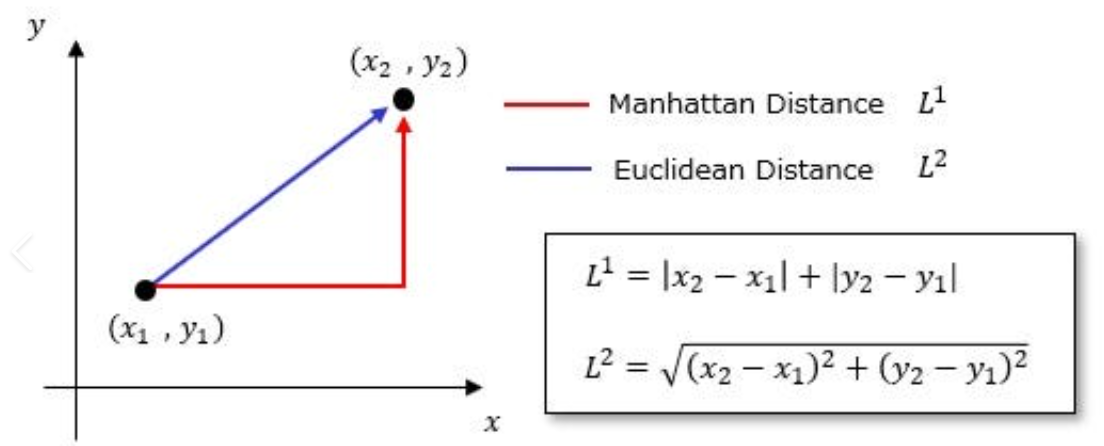


In [7]:
def euclidean_distance_fn(vector1, vector2):
    squared_sum = sum((x - y) ** 2 for x, y in zip(vector1, vector2))
    return math.sqrt(squared_sum)

Note that `euclidean_distance_fn` computes the distance between two individual vectors, not across an entire array. To see how it works, let's calculate the distance between the first vector (index 0) and the second vector (index 1):


Here, vector1 = embeddings[0] (first document's embedding) and vector2 = embeddings[1] (second document's embedding)

In [8]:
euclidean_distance_fn(embeddings[0], embeddings[1])

5.961788251769392

Of course, it does not matter which vector we put first into the function, the resulting distance is the same:


In [9]:
euclidean_distance_fn(embeddings[1], embeddings[0])

5.961788251769392

In order to calculate all of the distances between all of the vectors in the `embeddings` array, we can use nested loops. In the following, `i` and `j` are the indices of the vectors in the array: 


In [10]:
l2_dist_manual = np.zeros([4,4])
for i in range(embeddings.shape[0]):
    for j in range(embeddings.shape[0]):
        l2_dist_manual[i,j] = euclidean_distance_fn(embeddings[i], embeddings[j])

l2_dist_manual

array([[0.        , 5.96178825, 7.33939833, 7.15578303],
       [5.96178825, 0.        , 7.76861527, 7.39358919],
       [7.33939833, 7.76861527, 0.        , 5.91992832],
       [7.15578303, 7.39358919, 5.91992832, 0.        ]])

`l2_dist_manual` is a 4×4 array where each element represents the L2 distance between two vectors: the vector at the row index and the vector at the column index. For example, the distance between the first vector (index 0) and the second vector (index 1) is located at position `[0, 1]` in the array:


In [13]:
l2_dist_manual[0,1]

np.float64(5.961788251769392)

Moreover, you'll notice that the upper and lower triangles of the array are identical. This is not a coincidence. Just like with the `euclidean_distance_fn` function, the distance between vectors $a$ and $b$ should be identical to the distance between vectors $b$ and $a$:


In [12]:
l2_dist_manual[1,0]

np.float64(5.961788251769392)

#### Exercise 1 - Make the manual calculation more efficient


The code used to populate the `l2_dist_manual array` is not very efficient. First, it redundantly calculates the distance between a vector and itself, even though the L2 distance in such cases is always zero. Second, the array is symmetric—meaning the distance between vectors at indices $i$ and $j$ is the same as between $j$ and $i$. Therefore, each distance only needs to be computed once.

In the cell below, write an improved version of the code that avoids these inefficiencies. You only need to modify the part that says `### YOUR CODE GOES HERE ###`


In [ ]:
l2_dist_manual_improved = np.zeros([4,4])
for i in range(embeddings.shape[0]):
    for j in range(embeddings.shape[0]):
        ### YOUR CODE GOES HERE ###

l2_dist_manual_improved

<details>
    <summary>Click here for the solution</summary>

```python
l2_dist_manual_improved = np.zeros([4,4])
for i in range(embeddings.shape[0]):
    for j in range(embeddings.shape[0]):
        if j > i: # Calculate the upper triangle only
            l2_dist_manual_improved[i,j] = euclidean_distance_fn(embeddings[i], embeddings[j])
        elif i > j: # Copy the uper triangle to the lower triangle
            l2_dist_manual_improved[i,j] = l2_dist_manual[j,i]

l2_dist_manual_improved
```

</details>


### Calculate L2 distance using `scipy`


Instead of writing your own function, you can use a variety of different functions provided by external libraries to calculate the L2 distance. The example below uses a function from `scipy`: 


In [14]:
l2_dist_scipy = scipy.spatial.distance.cdist(embeddings, embeddings, 'euclidean')
l2_dist_scipy

array([[0.        , 5.96178849, 7.33939971, 7.15578152],
       [5.96178849, 0.        , 7.76861523, 7.39358991],
       [7.33939971, 7.76861523, 0.        , 5.91992766],
       [7.15578152, 7.39358991, 5.91992766, 0.        ]])

The following verifies that `l2_dist_manual` and `l2_dist_scipy` are identical (after accounting for rounding errors) by using the `allclose()` function from `numpy`:


In [ ]:
np.allclose(l2_dist_manual, l2_dist_scipy)

### Interpret the L2 Distance Results


An analysis of `l2_dist_scipy` shows that, in this case, the L2 distance metric performed well for similarity search. For example, the first vector—corresponding to the sentence `Bugs introduced by the intern had to be squashed by the lead developer.`—had the smallest distance to the second vector, which represents the sentence `Bugs found by the quality assurance engineer were difficult to debug.` This result aligns with expectations, as both sentences refer to programming bugs.

Similarly, the third and fourth sentences—both related to physical bugs rather than programming—were closest to each other in terms of distance, which again matches our intuition.


## Dot Product Similarity and Distance


The dot product between vectors $a$ and $b$ is calculated using  <br>
$$ a \cdot b = \sum_{i=1}^{n} a_i b_i $$

Let's define a custom function for calculating the dot product between two vectors.


### Manual implementation of dot product calculation


The function below implements the dot product formula:


In [ ]:
def dot_product_fn(vector1, vector2):
    return sum(x * y for x, y in zip(vector1, vector2))

Let's use the dot product function to calculate the dot product between the first and second vectors:


In [ ]:
dot_product_fn(embeddings[0], embeddings[1])

Just like we did with the L2 distance calculation, let's use nested loops to calculate the dot product between all vectors in the `embeddings` array:


In [ ]:
dot_product_manual = np.empty([4,4])
for i in range(embeddings.shape[0]):
    for j in range(embeddings.shape[0]):
        dot_product_manual[i,j] = dot_product_fn(embeddings[i], embeddings[j])

dot_product_manual

First, observe that the diagonal of the `dot_product_manual matrix` contains non-zero values. This is expected, as the dot product of a vector with itself is not zero. However, since these self-similarity scores aren't particularly informative, we can safely ignore them.

Excluding the diagonal, the matrix is symmetric—the upper triangle mirrors the lower triangle—as was the case with the L2 distance.

It's also important to remember that the dot product measures similarity, not distance. Higher values indicate greater similarity between vectors.

In this case, the dot product similarity performed well: the first two sentences are most similar to each other, and the last two sentences are most similar to each other, which aligns with our expectations.


### Calculate the dot product using matrix multiplication


We can compute the dot product efficiently using the [matrix multiplication](https://en.wikipedia.org/wiki/Matrix_multiplication) operator `@`. To do this, we multiply the `embeddings` matrix by its transpose. Since `embeddings` has a shape of 4×384, its transpose will be 384×4. Multiplying these gives us a 4×4 matrix, which is the desired result:


In [ ]:
# Matrix multiplication operator
dot_product_operator = embeddings @ embeddings.T
dot_product_operator

We can verify that the matrix multiplication operator returns the same result as our custom function after accounting for rounding:


In [ ]:
np.allclose(dot_product_manual, dot_product_operator, atol=1e-05)

Equivalently, if both of the matrices we want to multiply are two-dimensional, we can use the `matmul()` function from `numpy` instead:


In [ ]:
# Equivalent to `np.matmul()` if both arrays are 2-D:
np.matmul(embeddings,embeddings.T)

Finally, `numpy` also provides a `dot()` function, which provides an identical result:


In [ ]:
# `np.dot` returns an identical result, but `np.matmul` is recommended if both arrays are 2-D:
np.dot(embeddings,embeddings.T)

### Calculate dot product distance


The dot product between two vectors provides a similarity score. If, on the other hand, we would like a distance, we can simply take the negative of the dot product:


In [ ]:
dot_product_distance = -dot_product_manual
dot_product_distance

Although it might seem unusual for all the distances to be negative, the essential property of a distance metric is still preserved: smaller values indicate lower distance and thus greater similarity. So even with negative values, the relative comparisons remain valid—lower values still correspond to shorter distances.


## Cosine Similarity and Distance


The cosine similarity between vectors $a$ and $b$ is calculated using <br>
$$ \text{cossim}(a, b) = \frac{a \cdot b}{||a|| \ ||b||} =  \frac{a}{||a||} \cdot \frac{b}{||b||} $$

where $||a|| = \sqrt{\sum_{k=1}^n a_k^2}$ is the L2 norm, or the magnitude, of vector $a$, and $\cdot$ is the dot product.

Also note that $\frac{a}{||a||}$ represents a normalized vector. This means it has the same direction as vector $a$ but a magnitude (or length) of 1. Thus, cosine similarity can be calculated by taking the dot product of two normalized vectors.


### Manual implementation of cosine similarity calculation


Since we’ve already covered how to compute the dot product, our strategy for manually calculating cosine similarity will focus on normalizing the vectors. This is because cosine similarity is simply the dot product of two normalized vectors, as was shown after the last equals sign in the cosine similarity calculation formula.

However, in order to normalize vectors, we must first compute their L2 norms.


#### Calculate the L2 norm


The following calculates the L2 norms for all the vectors in the `embeddings` array. The calculation simply squares each vector component, sums across columns (note the `axis=1` parameter in the `sum`), and takes a square root:


In [ ]:
# L2 norms
l2_norms = np.sqrt(np.sum(embeddings**2, axis=1))
l2_norms

Note that the result is a vector with 4 numbers, each of which corresponds to the L2 norm, or the magnitude, of each vector. In order to normalize the vectors to a lenght of one, we should divide each vector's components by the norm. However, in order to do that efficiently, let's reshape the `l2_norms` vector into a 4x1 array:


In [ ]:
# L2 norms reshaped
l2_norms_reshaped = l2_norms.reshape(-1,1)
l2_norms_reshaped

#### Normalize embedding vectors


The following code calculates normalized embedding vectors by dividing every component in the vector by the vector's L2 norm:


In [ ]:
normalized_embeddings_manual = embeddings/l2_norms_reshaped
normalized_embeddings_manual

##### Exercise 2 - Verify that vectors are normalized


Verify that `normalized_embeddings_manual` are normalized vectors by making sure that the length of each vector is equal to 1.


In [ ]:
### YOUR CODE GOES HERE ###

<details>
    <summary>Click here for the solution</summary>

```python
# Note that the length of a vector can be found by taking its L2 norm. So, to solve this exercise, you just have to calculate the L2 norm of `normalized_embeddings_manual`, and verify that the sums are equal to or very close to 1:

np.sqrt(np.sum(normalized_embeddings_manual**2, axis=1))
```
</details>


#### Normalize embeddings using PyTorch


You can normalize embeddings in PyTorch using `torch.nn.functional.normalize()`. If your data is in a NumPy array, first convert it to a PyTorch tensor using `torch.from_numpy()`. After normalization, convert the tensor back to a NumPy array using the `numpy()` method:


In [ ]:
normalized_embeddings_torch = torch.nn.functional.normalize(
    torch.from_numpy(embeddings)
).numpy()
normalized_embeddings_torch

We can verify that the normalized embeddings we calculated manually and the normalized embeddings calculated using `torch` are indeed identical using numpy's `allclose()` function:


In [ ]:
np.allclose(normalized_embeddings_manual, normalized_embeddings_torch)

#### Calculate cosine similarity manually


To calculate cosine similarity between two normalized embedding vectors, we simply take their dot product. To do this, we can leverage the dot product function we defined before. For instance, the following calculates the cosine similarity between the vector embeddings of the first and second sentence:


In [ ]:
dot_product_fn(normalized_embeddings_manual[0], normalized_embeddings_manual[1])

Likewise, to calculate the cosine similarities between all normalized vectors, we can use a nested loop:


In [ ]:
cosine_similarity_manual = np.empty([4,4])
for i in range(normalized_embeddings_manual.shape[0]):
    for j in range(normalized_embeddings_manual.shape[0]):
        cosine_similarity_manual[i,j] = dot_product_fn(
            normalized_embeddings_manual[i], 
            normalized_embeddings_manual[j]
        )

cosine_similarity_manual

Cosine similarity ranges from -1 to 1. The cosine similarity matrix is symmetric, just like the matrices for L2 distance and the dot product. In this example, cosine similarity performed well: the first two sentences were most similar to each other, as were the last two—matching our expectations.


### Calculate cosine similarity using matrix multiplication


Just like with the dot product, we can compute cosine similarity using matrix algebra. By multiplying the matrix of normalized embeddings with its transpose using the matrix multiplication operator, we obtain the cosine similarity matrix. This works because, once vectors are normalized, cosine similarity can be calculated by simply taking the dot product:


In [ ]:
cosine_similarity_operator = normalized_embeddings_manual @ normalized_embeddings_manual.T
cosine_similarity_operator

We can verify that the matrix algebra solution is the same as the one found using the nested loop:


In [ ]:
np.allclose(cosine_similarity_manual, cosine_similarity_operator)

### Calculate cosine distance


The cosine distance between vectors $a$ and $b$ is simply 1 minus the cosine similarity between $a$ and $b$: <br>
$$ 1 - cossim(a,b) $$

Using numpy, this can be calculated as follows:


In [ ]:
1 - cosine_similarity_manual

## Exercise 3 - Similarity Search Using a Query


In the above examples, we calculated similarity between 4 documents:

```python
documents = [
    'Bugs introduced by the intern had to be squashed by the lead developer.',
    'Bugs found by the quality assurance engineer were difficult to debug.',
    'Bugs are common throughout the warm summer months, according to the entomologist.',
    'Bugs, in particular spiders, are extensively studied by arachnologists.'
]
```

Now, your task is to find which of these 4 documents is most similar to the query `Who is responsible for a coding project and fixing others' mistakes?` using cosine similarity. You can reuse the `documents` and `normalized_embeddings_manual` arrays in your answer:


In [ ]:
### YOUR CODE GOES HERE ###

<details>
    <summary>Click here for the solution</summary>

```python
# First, embed the query:
query_embedding = model.encode(
    ["Who is responsible for a coding project and fixing others' mistakes?"]
)

# Second, normalize the query embedding:
normalized_query_embedding = torch.nn.functional.normalize(
    torch.from_numpy(query_embedding)
).numpy()

# Third, calculate the cosine similarity between the documents and the query by using the dot product:
cosine_similarity_q3 = normalized_embeddings_manual @ normalized_query_embedding.T

# Fourth, find the position of the vector with the highest cosine similarity:
highest_cossim_position = cosine_similarity_q3.argmax()

# Fifth, find the document in that position in the `documents` array:
documents[highest_cossim_position]

# As you can see, the query retrieved the document `Bugs introduced by the intern had to be squashed by the lead developer.` which is what we would expect.
```
</details>


## Wrap-up


In this lab, you explored how to compute L2 distance, dot product similarity and distance, as well as cosine similarity and distance between pairs of vectors for the purposes of performing a similarity search. These computations were performed both through manually defined functions and by using built-in functions and methods from external Python libraries. This helped illustrate the mathematical foundations of vector similarity and how they are implemented in practical coding scenarios.


## Authors


[Wojciech \"Victor\" Fulmyk](https://www.linkedin.com/in/wfulmyk)


## Change Log


<details>
    <summary>Click here for the changelog</summary>

|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
| 2025-06-15 | 0.1 | Wojciech "Victor" Fulmyk | Initial version created |
| 2025-06-16 | 0.2 | Steve Ryan | ID review/typo fix |
| 2025-06-17 | 0.3 | Wojciech "Victor" Fulmyk | Fixed TOC and broken link |

</details>


Copyright © IBM Corporation. All rights reserved.
